In [1]:
import numpy as np

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap


In [8]:
df = pd.read_csv("dataset/fifa_countries_audience.txt")

In [9]:
df.head()

,country,confederation,population_share,tv_audience_share,gdp_weighted_share
0,United States,CONCACAF,4.5,4.3,11.3
1,Japan,AFC,1.9,4.9,9.1
2,China,AFC,19.5,14.8,7.3
3,Germany,UEFA,1.2,2.9,6.3
4,Brazil,CONMEBOL,2.8,7.1,5.4


In [10]:
df.shape

(191, 5)

# Q1: Which confederation with the highest population ?

In [31]:

value = df.groupby('confederation')['population_share'].sum().sort_values().values
label = df.groupby('confederation')['population_share'].sum().sort_values().index


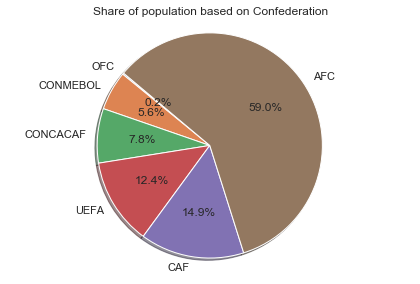

In [36]:
plt.pie(value,labels=label, autopct='%1.1f%%', shadow=True, startangle=140)
plt.tight_layout()
plt.axis('equal')
plt.title('Share of population based on Confederation')
plt.show()

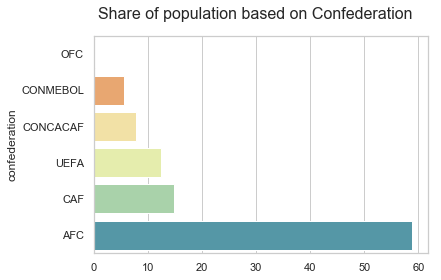

In [37]:
sns.set(style="whitegrid")

sns.barplot(x=value,y=label,palette='Spectral')

plt.suptitle('Share of population based on Confederation', fontsize=16);

# A1: AFC confideration

# Q2: Which confederation with the highest gdp ?

In [38]:
value = df.groupby('confederation')['gdp_weighted_share'].sum().sort_values().values
label = df.groupby('confederation')['gdp_weighted_share'].sum().sort_values().index


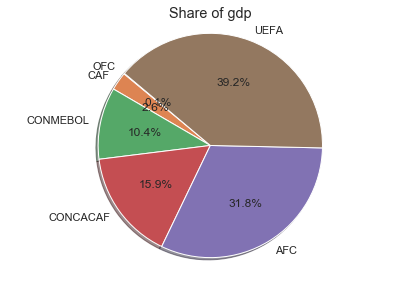

In [43]:
plt.pie(value,labels=label, autopct='%1.1f%%', shadow=True, startangle=140)
plt.tight_layout()
plt.axis('equal')
plt.suptitle('Share of gdp')
plt.show()

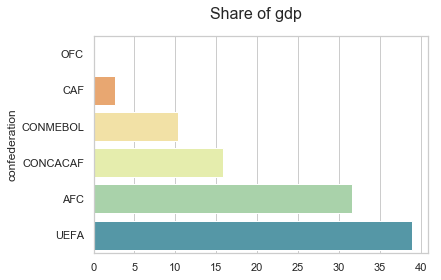

In [41]:
sns.set(style="whitegrid")

sns.barplot(x=value,y=label,palette='Spectral')

plt.suptitle('Share of gdp', fontsize=16);

In [47]:
long_lat = pd.read_csv("dataset/country_long_lat.csv")

In [48]:
long_lat.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [53]:
df_merge = pd.merge(df,long_lat,left_on='country',right_on='name')

# Location Of Country by their confederation

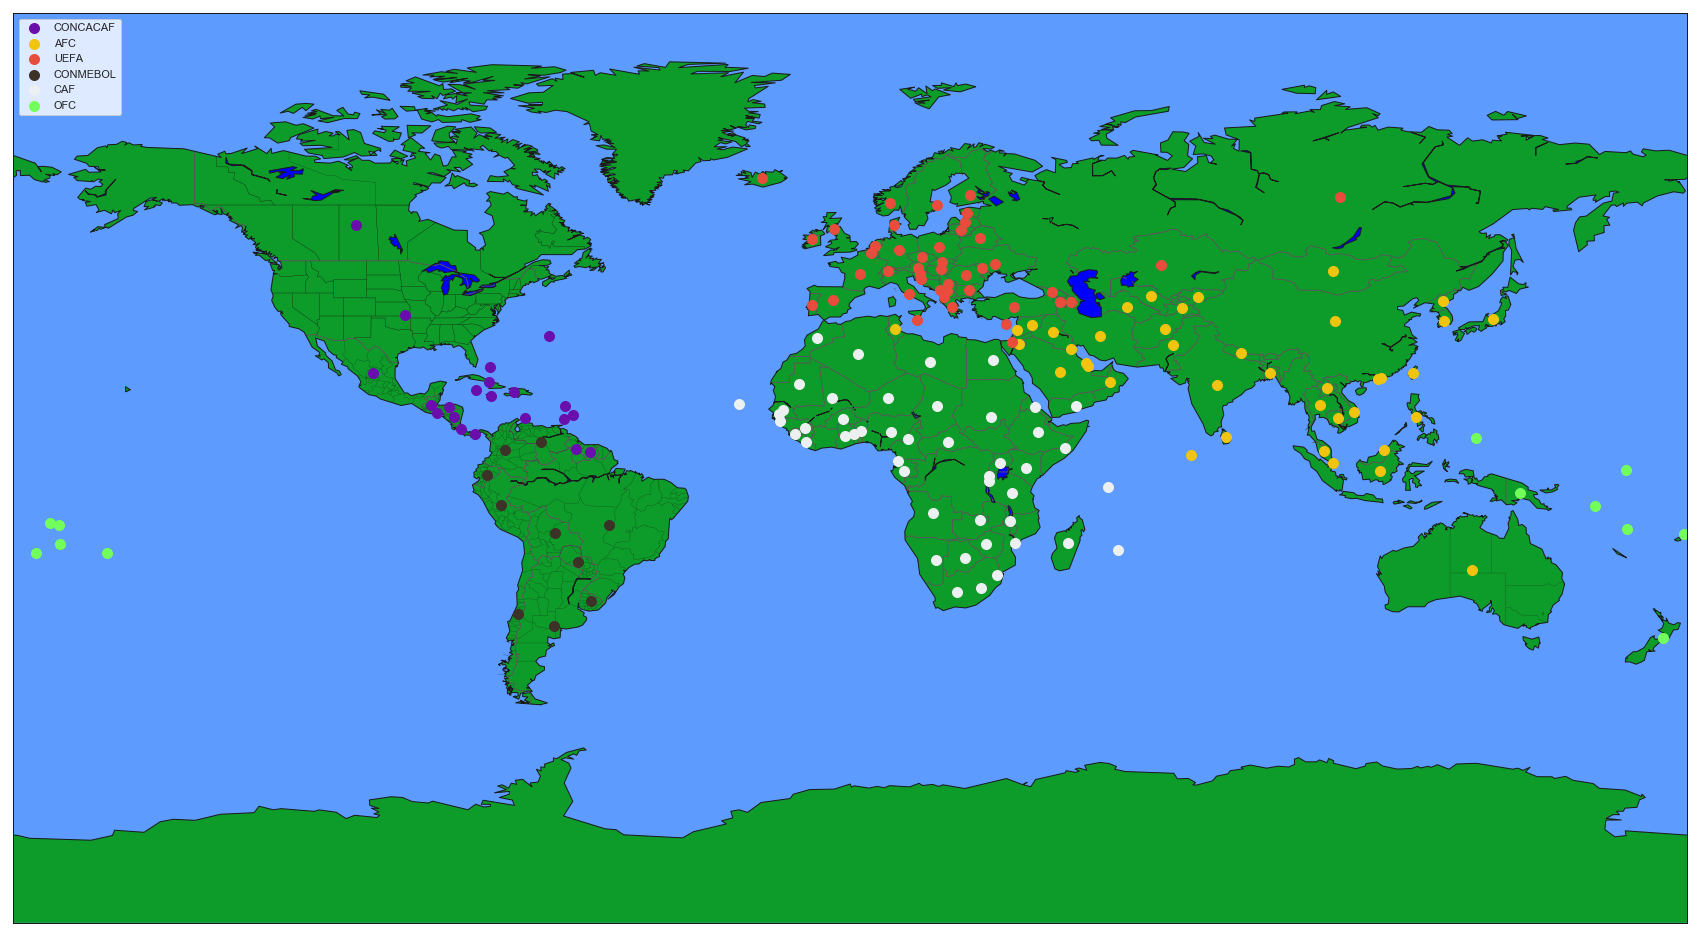

In [105]:
color_set = ["#6A0DAD","#F1C40F","#E74C3C","#3D3228","#ECF0F1","#73FF5B"]
plt.figure(figsize = (30,20))
m = Basemap(projection='gall')
m.fillcontinents(color="#0D9C29",lake_color="blue")
m.drawmapboundary(fill_color="#5D9BFF")
m.drawcountries(color='#585858',linewidth = 1)
m.drawstates(linewidth = 0.2)
m.drawcoastlines(linewidth=1)
i = 0
conf = list(df_merge.confederation.unique())
df_indo = df_merge[df_merge.confederation=='AFC']

for cont in conf:
    X, Y = m(list(df_merge[df_merge.confederation==cont].longitude),list(df_merge[df_merge.confederation==cont].latitude))
    m.scatter(X, Y, color=color_set[i],s=100,zorder=2,label=cont)
    i += 1
plt.legend()

plt.show()